#                                            Problem Statement
Our goal is to look at transcripts of various comedians and note their similarities and differences. Specifically, I'd like to know if Ali Wong's comedy style is different than other comedians

                                            Getting The Data

Luckily, there are wonderful people online that keep track of stand up routine transcripts. Scraps From The Loft makes them available for non-profit and educational purposes.

To decide which comedians to look into, I went on IMDB and looked specifically at comedy specials that were released in the past 5 years. To narrow it down further, I looked only at those with greater than a 7.5/10 rating and more than 2000 votes. If a comedian had multiple specials that fit those requirements, I would pick the most highly rated one. I ended up with a dozen comedy specials.

In [2]:
#web scraping,pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

In [3]:
#scrapes transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    #Returns transcript data specifically from scrapsfrometheloft.com
    page = requests.get(url).text
    soup = BeautifulSoup(page,"lxml")
    text = [p.text for p in soup.find(class_="post-content").find_all('p')]
    print(url)
    return text

In [4]:
#url of transcipt in scope
urls = ['http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
        'http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/']
#comedian names
comedians = ['louis','dave','ricky','bo','bill','jim','john','hasan','ali','anthony','mike','joe']

In [5]:
transcripts = [url_to_transcript(u) for u in urls]


http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/
http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/
http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/
http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/
http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/
http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/
http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/
http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/
http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/
http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/
http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/
http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-

In [10]:
import os
os.mkdir("C:\\Users\\yogesh.pawar\\NLP Project\\forgeeks-master\\transcripts")


In [11]:
for i,c in enumerate(comedians):
    with open("transcripts/" + c + ".txt","wb")as file:
        pickle.dump(transcripts[i],file)

In [12]:
#load pickled files
data = {}
for i, c in  enumerate(comedians):
 with open("transcripts/" + c + ".txt","rb")as file:
    data[c] = pickle.load(file)

In [13]:
#double check to make sure  data has been loaded properly
data.keys()

dict_keys(['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe'])

In [14]:
#more checks
data['louis'][:2]

['Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all.',
 '“The Old Lady And The Dog”\nI live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of them, it’s re

#                                      CLEANING THE DATA

In [15]:
#lETS look at the data again
next(iter(data.keys()))

'louis'

In [16]:
#Notice that our dictionary is currently in key"comedian,value:list of text format
next(iter(data.values()))

['Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all.',
 '“The Old Lady And The Dog”\nI live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of them, it’s re

In [17]:
#I am going to change  this to a key:comedian,value:string format
def combine_text(list_of_text):
    #Takes a list of text and combines then into one large chunk of text
    combined_text = ' '.join(list_of_text)
    return combined_text

In [18]:
#combine it
data_combined = {key:[combine_text(value)] for (key,value) in data.items()}
data_combined

{'louis': ['Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all. “The Old Lady And The Dog”\nI live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of them, i

In [19]:
# we can either keep it in dictionary format or put into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)
data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa..."
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello..."
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ..."
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo..."
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...


In [20]:
#lET'S look at the  transcript for ali wong
data_df.transcript.loc['ali']

"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, they just go to 

In [21]:
#Apply first round of text  cleaning techniques
#Make text lowercase,remove text in square brackets,remove punctaution and remove words containing numbers
import re
import string
def clean_text_round1(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text
round1 = lambda x: clean_text_round1(x)
    

In [22]:
#Lets look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told ’em i was gonna tape my special...
bill,all right thank you thank you very much thank you thank you thank you how are you what’s going on thank you it’s a pleasure to be here in the gre...
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this i...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
hasan,what’s up davis what’s up i’m home i had to bring it back here netflix said “where do you want to do the special la chicago new york” i was like...
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...
john,all right petunia wish me luck out there you will die on august that’s pretty good all right hello hello chicago nice to see you again thank you...
louis,intro\nfade the music out let’s roll hold there lights do the lights thank you thank you very much i appreciate that i don’t necessarily agree wit...


In [23]:
#Applying second round of cleaning
#Geeting rid of some additional punctuation and non-sensical text that was missed the first time around
def clean_text_round2(text):
    text = re.sub('\n','',text)
    return text
round2 = lambda x: clean_text_round2(x)


In [24]:
#Lets look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told ’em i was gonna tape my special...
bill,all right thank you thank you very much thank you thank you thank you how are you what’s going on thank you it’s a pleasure to be here in the gre...
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this i...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
hasan,what’s up davis what’s up i’m home i had to bring it back here netflix said “where do you want to do the special la chicago new york” i was like...
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...
john,all right petunia wish me luck out there you will die on august that’s pretty good all right hello hello chicago nice to see you again thank you...
louis,introfade the music out let’s roll hold there lights do the lights thank you thank you very much i appreciate that i don’t necessarily agree with ...


                                               Organizing The Data
                                               

In [25]:
#Lets add comedian fullname as well
full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']
data_df['full_name']= full_names
data_df

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,Bo Burnham
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",Hasan Minhaj
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",Jim Jefferies
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",Joe Rogan
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis C.K.


In [26]:
#Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

#                                    Document Term Matrix
                                            
 For many of the techniques we'll be using in future notebooks, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's CountVectorizer, where every row will represent a different document and every column will represent a different word.

In addition, with CountVectorizer, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.                                         

In [28]:
#we are going to create a DTM using count vectorizer  and exclude common english stop words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(),columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [29]:
#lET'S pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [30]:
#Lets also pickled the cleaned data(before we put in DTM)and the countvectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv,open("cv.pkl","wb"))

#                             EXPLORATOY DATA ANALYSIS
                                        
After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

Most common words - find these and create word clouds
Size of vocabulary - look number of unique words and also how quickly someone speaks
Amount of profanity - most common terms

In [31]:
#Most cmmon words
#Read in the DTM
import pandas as pd
data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


In [32]:
#Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]=list(zip(top.index,top.values))
top_dict

{'ali': [('like', 126),
  ('know', 65),
  ('just', 64),
  ('don', 61),
  ('shit', 34),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('wanna', 21),
  ('gotta', 21),
  ('oh', 21),
  ('husband', 20),
  ('got', 19),
  ('right', 19),
  ('women', 19),
  ('time', 19),
  ('cause', 18),
  ('day', 17),
  ('people', 16),
  ('pregnant', 15),
  ('need', 14),
  ('god', 14),
  ('yeah', 13),
  ('tell', 13),
  ('dude', 12),
  ('work', 12),
  ('really', 12),
  ('baby', 11),
  ('look', 11),
  ('fuck', 11)],
 'anthony': [('like', 50),
  ('know', 39),
  ('don', 38),
  ('joke', 35),
  ('got', 34),
  ('said', 31),
  ('ve', 28),
  ('anthony', 27),
  ('day', 26),
  ('just', 26),
  ('say', 26),
  ('people', 23),
  ('guys', 22),
  ('tell', 19),
  ('grandma', 19),
  ('right', 18),
  ('thing', 18),
  ('time', 17),
  ('think', 17),
  ('did', 16),
  ('dad', 16),
  ('baby', 16),
  ('school', 16),
  ('good', 16),
  ('yeah', 16),
  ('gonna', 15),
  ('jokes', 15),
  ('okay', 15),
  ('didn', 14),
  ('mad', 14)],
 'bil

In [33]:
#top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(','.join([word for word,count in top_words[0:14]]))
    print('---')

ali
like,know,just,don,shit,gonna,ok,lot,wanna,gotta,oh,husband,got,right
---
anthony
like,know,don,joke,got,said,ve,anthony,day,just,say,people,guys,tell
---
bill
like,just,right,know,don,gonna,got,fucking,yeah,shit,dude,ll,fuck,want
---
bo
know,like,love,bo,think,just,stuff,repeat,don,yeah,want,right,cos,ve
---
dave
like,know,said,just,shit,people,didn,don,ahah,time,fuck,fucking,black,man
---
hasan
like,know,don,dad,just,going,want,got,love,ve,hasan,right,say,time
---
jim
like,don,right,fucking,just,went,know,ve,people,day,oh,think,going,fuck
---
joe
like,people,just,don,fucking,fuck,gonna,know,think,shit,got,right,man,house
---
john
like,know,just,don,said,clinton,right,little,hey,time,got,mom,cause,people
---
louis
like,just,know,don,people,life,thing,gonna,cause,shit,time,good,tit,think
---
mike
like,know,said,just,don,think,says,jenny,cause,right,goes,really,point,mean
---
ricky
right,like,just,don,know,ve,said,yeah,fucking,got,say,went,people,didn
---


NOTE: At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.

In [34]:
#common words adding to stop words list
#Let's first pull out top 30  words by each comedian
from collections import Counter
words =[]
for comedian in data.columns:
    top = [word for (word,count)in top_dict[comedian]]
    for t in top:
        words.append(t)
words

['like',
 'know',
 'just',
 'don',
 'shit',
 'gonna',
 'ok',
 'lot',
 'wanna',
 'gotta',
 'oh',
 'husband',
 'got',
 'right',
 'women',
 'time',
 'cause',
 'day',
 'people',
 'pregnant',
 'need',
 'god',
 'yeah',
 'tell',
 'dude',
 'work',
 'really',
 'baby',
 'look',
 'fuck',
 'like',
 'know',
 'don',
 'joke',
 'got',
 'said',
 've',
 'anthony',
 'day',
 'just',
 'say',
 'people',
 'guys',
 'tell',
 'grandma',
 'right',
 'thing',
 'time',
 'think',
 'did',
 'dad',
 'baby',
 'school',
 'good',
 'yeah',
 'gonna',
 'jokes',
 'okay',
 'didn',
 'mad',
 'like',
 'just',
 'right',
 'know',
 'don',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'dude',
 'll',
 'fuck',
 'want',
 'think',
 'guy',
 'let',
 'people',
 'did',
 'didn',
 'make',
 'thing',
 'come',
 'going',
 'little',
 'doing',
 'everybody',
 'kid',
 'say',
 'old',
 'know',
 'like',
 'love',
 'bo',
 'think',
 'just',
 'stuff',
 'repeat',
 'don',
 'yeah',
 'want',
 'right',
 'cos',
 've',
 'fucking',
 'people',
 'eye',
 'said',
 'c

In [35]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 12),
 ('know', 12),
 ('just', 12),
 ('don', 12),
 ('right', 12),
 ('people', 12),
 ('got', 10),
 ('time', 9),
 ('say', 9),
 ('gonna', 8),
 ('oh', 8),
 ('said', 8),
 ('think', 8),
 ('yeah', 7),
 ('fuck', 7),
 ('didn', 7),
 ('cause', 6),
 ('really', 6),
 ('ve', 6),
 ('good', 6),
 ('fucking', 6),
 ('going', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('did', 5),
 ('ll', 5),
 ('want', 5),
 ('guy', 4),
 ('come', 4),
 ('little', 4),
 ('man', 4),
 ('women', 3),
 ('dude', 3),
 ('guys', 3),
 ('dad', 3),
 ('let', 3),
 ('old', 3),
 ('life', 3),
 ('went', 3),
 ('way', 3),
 ('mean', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('god', 2),
 ('tell', 2),
 ('baby', 2),
 ('look', 2),
 ('joke', 2),
 ('school', 2),
 ('make', 2),
 ('everybody', 2),
 ('love', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('girl', 2),
 ('goes', 2),
 ('house', 2),
 ('real', 2),
 ('kids', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('work', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes',

In [36]:
#If more than half of the comdians have it as a top word,exclude it from the list
add_stop_words = [word for word,count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'know',
 'just',
 'don',
 'right',
 'people',
 'got',
 'time',
 'say',
 'gonna',
 'oh',
 'said',
 'think',
 'yeah',
 'fuck',
 'didn']

In [37]:
#Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

#Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

#Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

#Recreate DTM
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(),columns=cv.get_feature_names())
data_stop.index=data_clean.index

#pickle it for later use
import pickle
pickle.dump(cv,open("cv_stop.pkl","wb"))
data_stop.to_pickle("dtm_stop.pkl")


In [42]:
#lets make some world clouds
from wordcloud  import WordCloud
wc = WordCloud(stopwords=stop_words,background_color="white",colormap="Dark2",max_font_size=150,random_state=42)
wc

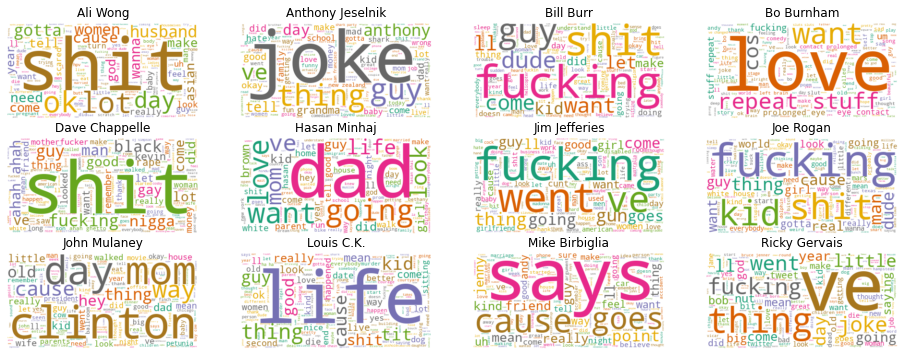

In [50]:
#Reset the output dimensions
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams['figure.figsize'] = [16,6]
full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']
#create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    plt.subplot(3,4,index+1)
    plt.imshow(wc,interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()
    

                                         FINDINGS
  Ali Wong says the s-word a lot and talks about her husband.
  A lot of people use the F-word. Let's dig into that later.

                                         NUMBER OF WORDS                             

In [65]:
# Find the number of unique words that each comedian uses
unique_list =[]
for comedian in data.columns:
    uniques = data[comedian].nonzero()[0].size
    unique_list.append(uniques)
#creating a new dataframe that contains the unique word count
data_words = pd.DataFrame(list(zip(full_names,unique_list)),columns=['comedian','unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

AttributeError: 'Series' object has no attribute 'nonzero'

In [53]:
#calculating the words per minute for each comedia
#find the total no of words  that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)

# comedy special run times from IMDB in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

#Let's add some column to dataframes
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

#sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

NameError: name 'data_words' is not defined

In [66]:
# Let's plot our findings
import numpy as np
y_pos = np.arange(len(data_words))
plt.subplot(1,2,1)
plt.barh(y_pos,data_unique_sort.unique_words,align='center')
plt.yticks(y_pos,data_unique_sort.comedian)
plt.title('Number of unique words',fontsize = 20)

plt.subplot(1,2,2)
plt.barh(y_pos,data_wpm_sort.words_per_minute,align='center')
plt.yticks(y_pos,data_wpm_sort.comedian)
plt.title('Number of words per minute',fontsize=20)

plt.tight_layout()
plt.show()


NameError: name 'data_words' is not defined

                                                 Findings
Vocabulary

Ricky Gervais (British comedy) and Bill Burr (podcast host) use a lot of words in their comedy

Louis C.K. (self-depricating comedy) and Anthony Jeselnik (dark humor) have a smaller vocabulary
Talking Speed

Joe Rogan (blue comedy) and Bill Burr (podcast host) talk fast

Bo Burnham (musical comedy) and Anthony Jeselnik (dark humor) talk slow

Ali Wong is somewhere in the middle in both cases

                                                Amount of Profanity

In [67]:
#Let's take a look at the most common words again
Counter(words).most_common()

[('like', 12),
 ('know', 12),
 ('just', 12),
 ('don', 12),
 ('right', 12),
 ('people', 12),
 ('got', 10),
 ('time', 9),
 ('say', 9),
 ('gonna', 8),
 ('oh', 8),
 ('said', 8),
 ('think', 8),
 ('yeah', 7),
 ('fuck', 7),
 ('didn', 7),
 ('cause', 6),
 ('really', 6),
 ('ve', 6),
 ('good', 6),
 ('fucking', 6),
 ('going', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('did', 5),
 ('ll', 5),
 ('want', 5),
 ('guy', 4),
 ('come', 4),
 ('little', 4),
 ('man', 4),
 ('women', 3),
 ('dude', 3),
 ('guys', 3),
 ('dad', 3),
 ('let', 3),
 ('old', 3),
 ('life', 3),
 ('went', 3),
 ('way', 3),
 ('mean', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('god', 2),
 ('tell', 2),
 ('baby', 2),
 ('look', 2),
 ('joke', 2),
 ('school', 2),
 ('make', 2),
 ('everybody', 2),
 ('love', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('girl', 2),
 ('goes', 2),
 ('house', 2),
 ('real', 2),
 ('kids', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('work', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes',

In [68]:
#Let's isolate this bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck,data_bad_words.shit],axis =1)
data_profanity.columns = ['f_word','s_word']
data_profanity

,f_word,s_word
ali,16,34
anthony,15,9
bill,106,64
bo,37,7
dave,65,45
hasan,24,15
jim,116,20
joe,136,40
john,4,6
louis,21,25


Text(0, 0.5, 'Number of S words')

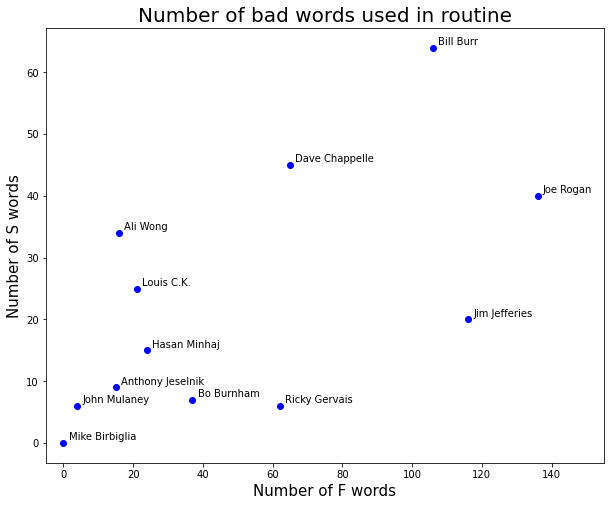

In [69]:
#let's create a scatter plot 
plt.rcParams['figure.figsize']=[10,8]
for i,comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x,y,color='blue')
    plt.text(x+1.5,y+0.5,full_names[i],fontsize=10)
    plt.xlim(-5,155)
plt.title('Number of bad words used in routine',fontsize=20)
plt.xlabel('Number of F words',fontsize = 15)
plt.ylabel('Number of S words',fontsize = 15)

                                              Findings
                                    
Averaging 2 F-Words Per Minute! - I don't like too much swearing, especially the f-word, which is probably why I've never heard of Bill Bur, Joe Rogan and Jim Jefferies.
Clean Humor - It looks like profanity might be a good predictor of the type of comedy I like. Besides Ali Wong, my two other favorite comedians in this group are John Mulaney and Mike Birbiglia.

#                                    Sentiment Analysis
    
    Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.
    Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

In [70]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd
data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,Bo Burnham
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",Hasan Minhaj
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",Jim Jefferies
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",Joe Rogan
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis C.K.


In [72]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob

from textblob import TextBlob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",Anthony Jeselnik,0.054285,0.559732
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr,0.016479,0.537016
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,Bo Burnham,0.074514,0.539368
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle,-0.002690,0.513958
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",Hasan Minhaj,0.086856,0.460619
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",Jim Jefferies,0.044224,0.523382
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",Joe Rogan,0.004968,0.551628
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",John Mulaney,0.082355,0.484137
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis C.K.,0.056665,0.515796


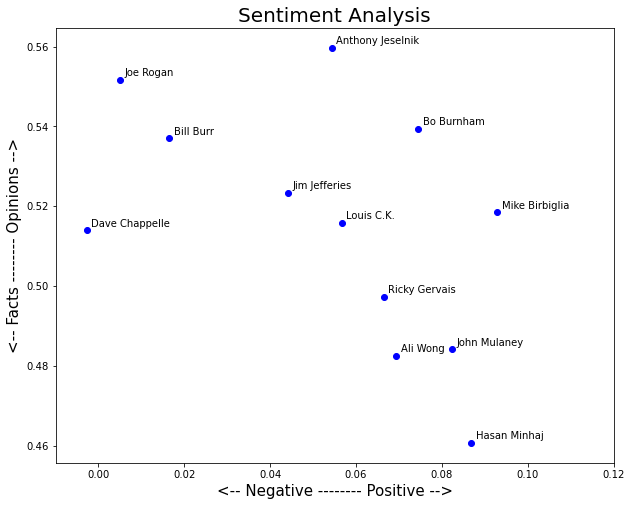

In [73]:
#Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()


    

In [74]:
# Sentiment of Routine Over Time
#Instead of looking at the overall sentiment, 
#let's see if there's anything interesting about the sentiment over time throughout each routine

#split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
#Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.
# Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    #pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [75]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",Anthony Jeselnik,0.054285,0.559732
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr,0.016479,0.537016
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,Bo Burnham,0.074514,0.539368
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle,-0.002690,0.513958
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",Hasan Minhaj,0.086856,0.460619
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",Jim Jefferies,0.044224,0.523382
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",Joe Rogan,0.004968,0.551628
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",John Mulaney,0.082355,0.484137
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis C.K.,0.056665,0.515796


In [76]:
#Let's create  a list to hold all of the pieces of text
#update numpy and conda
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
list_pieces

[['Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, they just go t

In [77]:
# The list has 10 elements, one for each transcript
len(list_pieces)


12

In [78]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [79]:
# Calculate the polarity for each piece of text
polarity_transcript = []
for lp in list_pieces:
    polarity_piece=[]
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
polarity_transcript

[[0.11168482647296207,
  0.056407029478458055,
  0.09445691155249979,
  0.09236886724386723,
  -0.014671592775041055,
  0.09538361348808912,
  0.06079713127248339,
  0.08721655328798185,
  0.030089690638160044,
  0.07351994851994852],
 [0.13933883477633482,
  -0.06333451704545455,
  -0.056153799903799935,
  0.014602659245516405,
  0.16377334420812684,
  0.09091338259441709,
  0.09420031055900621,
  0.11566683919944787,
  -0.05070608684245053,
  0.058467487373737366],
 [-0.0326152022580594,
  0.006825656825656827,
  0.023452001215159095,
  0.01934081890331888,
  -0.026312183887941466,
  0.06207506613756614,
  0.030250682288725742,
  -0.020351594027441484,
  -0.01150485008818343,
  0.10757491470108295],
 [0.17481829573934843,
  -0.04116923483102918,
  -0.022686011904761886,
  0.019912549136687042,
  0.0592493946731235,
  0.05700242218099361,
  0.04407051282051284,
  0.11019892033865757,
  0.19319944575626394,
  0.23029900332225917],
 [-0.05093449586407334,
  -0.05557354333778966,
  0.035

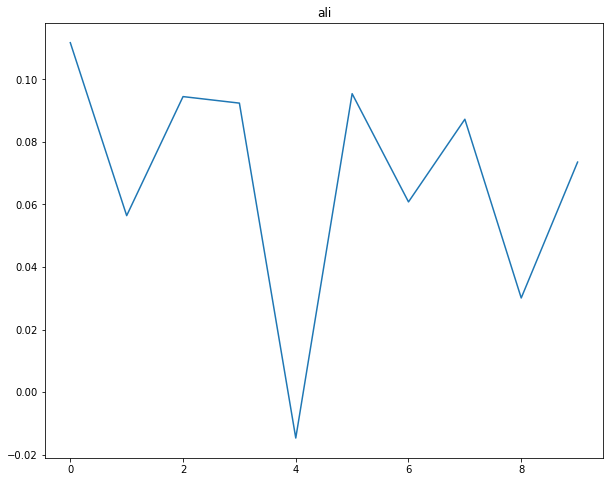

In [80]:
# Showing the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

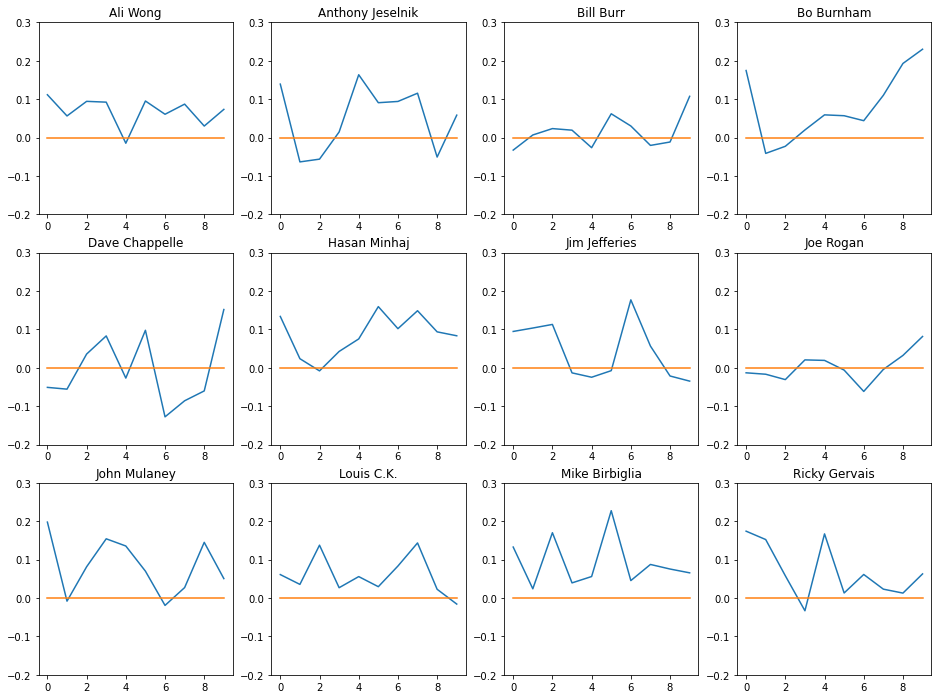

In [81]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
plt.show()

                                             Findings
Ali Wong stays generally positive throughout her routine. Similar comedians are Louis C.K. and Mike Birbiglia.

On the other hand, we have some pretty different patterns here like Bo Burnham who gets happier as time passes and Dave Chappelle who has some pretty down moments in his routine.

#                                      Topic Modelling

Another popular text analysis technique is called topic modeling. The ultimate goal of topic modeling is to find various topics that are present in your corpus. Each document in the corpus will be made up of at least one topic, if not multiple topics.

To use a topic modeling technique, you need to provide (1) a document-term matrix and (2) the number of topics you would like the algorithm to pick up using LDA(Latent Dirichlet Allocation)

In [82]:
#Topic Modelling -Attempt 1(All text)
# Let's read in our document-term matrix
import pandas as pd
import pickle

data = pd.read_pickle('dtm_stop.pkl')
data

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [84]:
# Import the necessary modules for LDA with gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim

from gensim import matutils,models
import scipy.sparse

#import logging
#ogging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [85]:
# One of the required inputs is a term-document matrix
tdm = data.transpose()
tdm.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


In [86]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [87]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("cv_stop.pkl","rb"))
id2word = dict((v,k)for k,v in cv.vocabulary_.items())

Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term), we need to specify two other parameters - the number of topics and the number of passes. Let's start the number of topics at 2, see if the results make sense, and increase the number from there.

In [88]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes

lda = models.LdaModel(corpus = corpus, id2word=id2word,num_topics=2,passes=10)
lda.print_topics()

[(0,
  '0.011*"fucking" + 0.009*"shit" + 0.006*"going" + 0.005*"want" + 0.005*"ve" + 0.005*"man" + 0.005*"ll" + 0.004*"come" + 0.004*"day" + 0.004*"guy"'),
 (1,
  '0.007*"ve" + 0.005*"ll" + 0.005*"thing" + 0.005*"cause" + 0.005*"little" + 0.005*"day" + 0.004*"really" + 0.004*"good" + 0.004*"life" + 0.004*"love"')]

In [89]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus,id2word=id2word,num_topics=3,passes=10)
lda.print_topics()

[(0,
  '0.008*"fucking" + 0.007*"shit" + 0.006*"life" + 0.005*"want" + 0.005*"going" + 0.005*"love" + 0.005*"ll" + 0.005*"man" + 0.005*"dad" + 0.005*"ve"'),
 (1,
  '0.012*"fucking" + 0.009*"ve" + 0.008*"went" + 0.006*"ll" + 0.006*"going" + 0.005*"shit" + 0.005*"day" + 0.005*"thing" + 0.005*"good" + 0.005*"man"'),
 (2,
  '0.006*"cause" + 0.005*"day" + 0.005*"ve" + 0.005*"says" + 0.005*"really" + 0.005*"tell" + 0.004*"ll" + 0.004*"lot" + 0.004*"shit" + 0.004*"goes"')]

In [90]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus,id2word=id2word,num_topics=4,passes=10)
lda.print_topics()

[(0,
  '0.011*"fucking" + 0.008*"shit" + 0.007*"want" + 0.007*"love" + 0.006*"ll" + 0.005*"did" + 0.005*"let" + 0.005*"stuff" + 0.005*"dude" + 0.005*"little"'),
 (1,
  '0.007*"shit" + 0.007*"ve" + 0.007*"fucking" + 0.006*"day" + 0.006*"thing" + 0.006*"cause" + 0.006*"good" + 0.005*"went" + 0.005*"really" + 0.005*"ll"'),
 (2,
  '0.011*"dad" + 0.007*"going" + 0.007*"want" + 0.006*"love" + 0.006*"ve" + 0.005*"hasan" + 0.005*"mom" + 0.004*"life" + 0.004*"hey" + 0.004*"did"'),
 (3,
  '0.009*"fucking" + 0.006*"ve" + 0.006*"ll" + 0.005*"cause" + 0.005*"going" + 0.005*"really" + 0.005*"says" + 0.004*"went" + 0.004*"mean" + 0.004*"thing"')]

In [91]:
#These topics aren't looking too great. We've tried modifying our parameters. Let's try modifying our terms list as well.

                                        Topic Modeling - Attempt #2 (Nouns Only)

In [92]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [93]:
# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('data_clean.pkl')
data_clean

,transcript
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told ’em i was gonna tape my special...
bill,all right thank you thank you very much thank you thank you thank you how are you what’s going on thank you it’s a pleasure to be here in the gre...
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this i...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
hasan,what’s up davis what’s up i’m home i had to bring it back here netflix said “where do you want to do the special la chicago new york” i was like...
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...
john,all right petunia wish me luck out there you will die on august that’s pretty good all right hello hello chicago nice to see you again thank you...
louis,introfade the music out let’s roll hold there lights do the lights thank you thank you very much i appreciate that i don’t necessarily agree with ...


In [94]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns))
data_nouns

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\yogesh.pawar/nltk_data'
    - 'c:\\users\\yogesh.pawar\\appdata\\local\\continuum\\miniconda3\\nltk_data'
    - 'c:\\users\\yogesh.pawar\\appdata\\local\\continuum\\miniconda3\\share\\nltk_data'
    - 'c:\\users\\yogesh.pawar\\appdata\\local\\continuum\\miniconda3\\lib\\nltk_data'
    - 'C:\\Users\\yogesh.pawar\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [95]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

NameError: name 'data_nouns' is not defined

In [96]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

NameError: name 'data_dtmn' is not defined

In [97]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

NameError: name 'corpusn' is not defined

In [98]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

NameError: name 'corpusn' is not defined

In [99]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

NameError: name 'corpusn' is not defined

                        Topic Modeling - Attempt #3 (Nouns and Adjectives)

In [100]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [101]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
data_nouns_adj

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\yogesh.pawar/nltk_data'
    - 'c:\\users\\yogesh.pawar\\appdata\\local\\continuum\\miniconda3\\nltk_data'
    - 'c:\\users\\yogesh.pawar\\appdata\\local\\continuum\\miniconda3\\share\\nltk_data'
    - 'c:\\users\\yogesh.pawar\\appdata\\local\\continuum\\miniconda3\\lib\\nltk_data'
    - 'C:\\Users\\yogesh.pawar\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [6]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

NameError: name 'CountVectorizer' is not defined

In [ ]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [ ]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

In [ ]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

In [ ]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

                                           FINDINGS
Identify Topics in Each Document
Out of the 9 topic models we looked at, the nouns and adjectives, 4 topic one made the most sense. So let's pull that down here and run it through some more iterations to get more fine-tuned topics.

In [ ]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

                                         FINDINGS

These four topics look pretty decent. Let's settle on these for now.

Topic 0: mom, parents
Topic 1: husband, wife
Topic 2: guns
Topic 3: profanity

In [ ]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

FINDINGS

For a first pass of LDA, these kind of make sense to me, so we'll call it a day for now.

Topic 0: mom, parents [Ali, Dave, Louis]
Topic 1: husband, wife [Bo, Hasan, Jim]
Topic 2: guns [Anthony,ricky]
Topic 3: profanity [Bill,Joe,John]

#                                                Text Generation

Markov chains can be used for very basic text generation. Think about every word in a corpus as a state. We can make a simple assumption that the next word is only dependent on the previous word - which is the basic assumption of a Markov chain.

Markov chains don't generate text as well as deep learning, but it's a good (and fun!) start.

In [7]:
# Read in the corpus, including punctuation!
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan
john,"All right, Petunia. Wish me luck out there. Yo...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.


In [8]:
# Extract only Ali Wong's text
ali_text = data.transcript.loc['ali']
ali_text[:200]

'Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, l'

                                        Build a Markov Chain Function

We are going to build a simple Markov chain function that creates a dictionary:

The keys should be all of the words in the corpus
The values should be a list of the words that follow the keys

In [9]:
from collections import defaultdict

def markov_chain(text):
    '''The input is a string of text and the output will be a dictionary with each word as
       a key and each value as the list of words that come after the key in the text.'''
    
    # Tokenize the text by word, though including punctuation
    words = text.split(' ')
    
    # Initialize a default dictionary to hold all of the words and next words
    m_dict = defaultdict(list)
    
    # Create a zipped list of all of the word pairs and put them in word: list of next words format
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)

    # Convert the default dict back into a dictionary
    m_dict = dict(m_dict)
    return m_dict

In [10]:
# Create the dictionary for Ali's routine, take a look at it
ali_dict = markov_chain(ali_text)
ali_dict

{'Ladies': ['and'],
 'and': ['gentlemen,',
  'foremost,',
  'then',
  'have',
  'there’s',
  'resentment',
  'get',
  'get',
  'says,',
  'my',
  'she',
  'snatch',
  'running',
  'fighting',
  'yelling',
  'it',
  'she',
  'I',
  'I',
  'I',
  'we',
  'watched',
  'I',
  'have',
  'that',
  'recycling,',
  'disturbing',
  'it’s',
  'all',
  'just…',
  'be',
  'half-Vietnamese.',
  'his',
  'slide.',
  'your',
  'inflamed',
  'you’re',
  'I',
  'half-Japanese',
  'I’m',
  'half-Vietnamese.',
  'playing',
  'rugby.',
  'foremost,',
  'a',
  'emotionally',
  'I',
  '20',
  'neither',
  'I',
  'I–',
  'then',
  'it’s',
  'find',
  'start',
  'just',
  'caves',
  'gets',
  'is',
  'very',
  'for',
  'I',
  'she',
  'rise',
  'be',
  'eat',
  'watch',
  'be',
  'now',
  'most',
  'in',
  'then',
  'digitally',
  'then',
  'then',
  'then',
  'steady',
  'brings',
  'let',
  'reverberate',
  'say,',
  'my',
  'he',
  'when',
  'I’m',
  'sicker,',
  'sicker.',
  'sicker,',
  'sicker,',
  'pos

                                    Create a Text Generator

We're going to create a function that generates sentences. It will take two things as inputs:

The dictionary you just created
The number of words you want generated

In [15]:
import random

def generate_sentence(chain, count=15):
    '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''

    # Capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # Generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    # End it with a period
    sentence += '.'
    return(sentence)

In [19]:
generate_sentence(ali_dict)

'Confusing… for us, and 20 percent of men are both total, like, way for warmth?.'